In [48]:
import pandas as pd
import numpy as np

In [49]:
dataset=pd.read_csv(r"/content/drive/MyDrive/Datasets/diabetes.csv")
dataset.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [50]:
# 1) Data Preprocessing
# 2) Data Imbalancing
# 3) Standerdization
# 4) Machine Learning Algos
# 5) Model imporvization

In [51]:
# Data Preprocessing

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

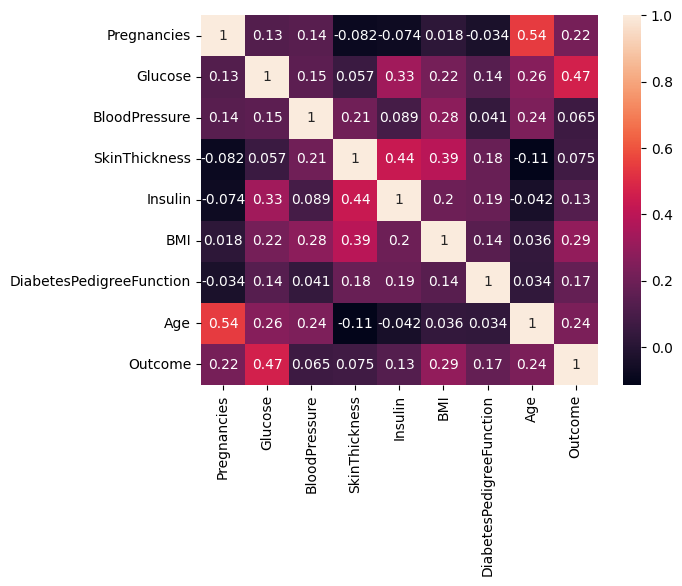

In [54]:
# lets check Co-Relation
import seaborn as sns
sns.heatmap(data=dataset.corr(),annot=True)

In [55]:
mn=dataset["Insulin"].mean()
mn=round(mn)
mn

80

In [56]:
dataset["Insulin"]=dataset["Insulin"].replace(0,mn)

In [57]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,0,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,80,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,80,30.1,0.349,47,1


<Axes: >

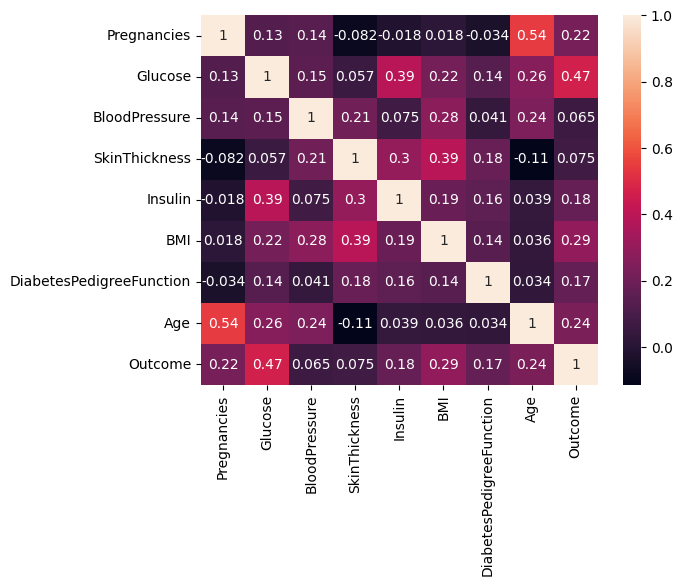

In [58]:
sns.heatmap(data=dataset.corr(),annot=True)

In [59]:
mn1=dataset["SkinThickness"].mean()
mn1=round(mn1)
mn1

21

In [60]:
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,mn1)

<Axes: >

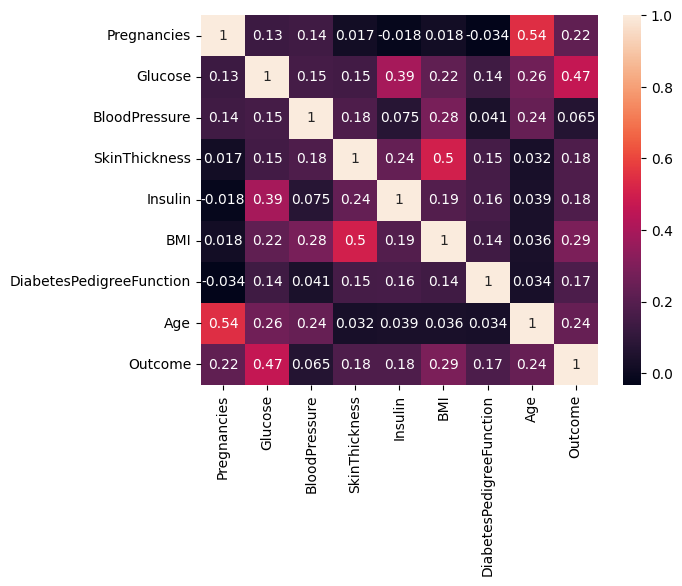

In [61]:
sns.heatmap(data=dataset.corr(),annot=True)

In [62]:
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [63]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [64]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [65]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [66]:
from imblearn.over_sampling import RandomOverSampler
rms=RandomOverSampler()
x_data,y_data=rms.fit_resample(x,y)

In [67]:
from collections import Counter
print(Counter(y_data))

Counter({1: 500, 0: 500})


In [68]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_scale=std.fit_transform(x_data)

In [69]:
x_scale

array([[ 0.53415615,  0.68566147,  0.10263035, ...,  0.12219055,
         0.40712127,  1.36508584],
       [-0.88874249, -1.23120884, -0.2025144 , ..., -0.77485597,
        -0.40824387, -0.27740868],
       [ 1.1033156 ,  1.75058941, -0.30422932, ..., -1.19774934,
         0.54006123, -0.1909616 ],
       ...,
       [-0.31958303,  1.7201629 ,  0.20434527, ..., -0.27507291,
        -0.4259692 , -0.45030284],
       [ 0.81873587,  1.08120613,  0.81463477, ..., -0.28788786,
        -0.95772907,  1.1057446 ],
       [ 1.38789533,  1.35504475,  0.20434527, ...,  1.45494539,
        -0.25462435,  0.75995628]])

In [70]:
a1=x_scale.mean()
a1=round(a1)
a1

0

In [71]:
a2=x_scale.var()
a2=round(a2)
a2

1

In [72]:
data=pd.DataFrame(x_scale)
data

,0,1,2,3,4,5,6,7
0,0.534156,0.685661,0.102630,0.794347,-0.471189,0.122191,0.407121,1.365086
1,-0.888742,-1.231209,-0.202514,0.167478,-0.471189,-0.774856,-0.408244,-0.277409
2,1.103316,1.750589,-0.304229,-0.668346,-0.471189,-1.197749,0.540061,-0.190962
3,-0.888742,-1.109503,-0.202514,-0.459390,-0.327945,-0.582632,-0.951821,-1.141879
4,-1.173322,0.350970,-1.524808,0.794347,0.429198,1.339611,5.314083,-0.104515
...,...,...,...,...,...,...,...,...
995,-0.319583,0.989927,0.306060,0.898825,1.217036,-0.134108,1.068867,-0.536750
996,-1.173322,1.933148,1.730069,-0.250434,-0.471189,0.211895,-0.160089,0.587062
997,-0.319583,1.720163,0.204345,-0.668346,-0.471189,-0.275073,-0.425969,-0.450303
998,0.818736,1.081206,0.814635,-0.668346,-0.471189,-0.287888,-0.957729,1.105745


<Axes: >

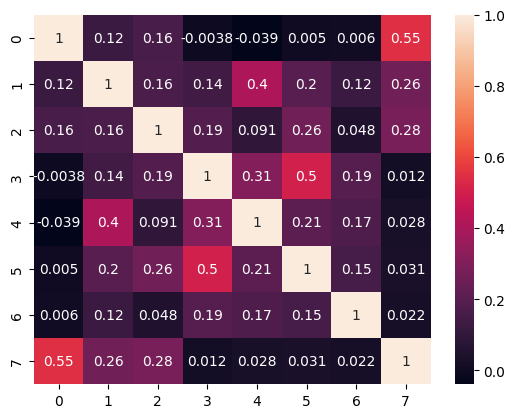

In [73]:
sns.heatmap(data=data.corr(),annot=True)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_data,test_size=0.2,random_state=3)

In [75]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 407, 1: 393})
Counter({1: 107, 0: 93})


In [76]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

LogisticRegression()

In [77]:
# from sklearn.ensemble import RandomForestClassifier
# rfc=RandomForestClassifier(n_estimators=10)
# rfc.fit(x_train,y_train)

from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=l1,n_estimators=10)
bg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression())

In [78]:
# Voting Classifier

In [79]:
y_pred=bg.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_pred,y_test)*100
cm=confusion_matrix(y_pred,y_test)
print("Accuracy Score:",ac," Confusion Matrix: ",cm)

Accuracy Score: 77.0  Confusion Matrix:  [[72 25]
 [21 82]]


In [81]:
# Logistic Regression: Accuracy Score: 74.5
# RandomForest : Accuracy Score: 89.0
# Bagging Classifier :"Accuracy Score:",75.5

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

knn=KNeighborsClassifier()
sv=SVC()
nv=GaussianNB()

In [83]:
from sklearn.ensemble import VotingClassifier
max_vote=VotingClassifier(estimators=[('Naive Bayes',nv),('Suport vector',sv),('KNN:',knn)])
max_vote.fit(x_train,y_train)
y_pred_max=max_vote.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_pred_max,y_test)*100
cm=confusion_matrix(y_pred_max,y_test)
print("Accuracy Score:",ac," Confusion Matrix: ",cm)

Accuracy Score: 75.5  Confusion Matrix:  [[72 28]
 [21 79]]
